# Exploratory Data Analysis of Saildrone Data

This notebook looks at data from [NOAA/PMEL 2019 Arctic Saildrone Missions](https://data.pmel.noaa.gov/pmel/erddap/search/index.html?page=1&itemsPerPage=1000&searchFor=NOAA%2FPMEL+2019+arctic+saildrone+mission). Used to test methods for accessing saildrone data from an SSD.  
All saildrone datasets can be accessed using [this link](https://data.pmel.noaa.gov/pmel/erddap/search/index.html?page=1&itemsPerPage=1000&searchFor=saildrone).

## Metadata

### Import Python modules

In [1]:
import xarray as xr
import matplotlib.pyplot as plt

### Load dataset

In [2]:
fpath = 'D:/saildrone/all/'
fname = 'Arctic2019_sd1034_all.nc'
ds = xr.open_dataset(fpath + fname)
ds

<xarray.Dataset>
Dimensions:                          (time: 197608)
Coordinates:
    trajectory                       float32 ...
  * time                             (time) datetime64[ns] 2019-05-16T22:00:0...
    latitude                         (time) float64 ...
    longitude                        (time) float64 ...
Data variables: (12/93)
    SOG                              (time) float64 ...
    SOG_FILTERED_MEAN                (time) float64 ...
    SOG_FILTERED_STDDEV              (time) float64 ...
    SOG_FILTERED_MAX                 (time) float64 ...
    SOG_FILTERED_MIN                 (time) float64 ...
    COG                              (time) float64 ...
    ...                               ...
    TEMP_O2_RBR_MEAN                 (time) float64 ...
    TEMP_O2_RBR_STDDEV               (time) float64 ...
    CHLOR_WETLABS_MEAN               (time) float64 ...
    CHLOR_WETLABS_STDDEV             (time) float64 ...
    CHLOR_RBR_MEAN                   (time) float64 ...
    CHLOR_RBR_STDDEV                 (time) float64 ...

### Access data

Look at keys to access data

In [3]:
vars = list(ds.data_vars)
print(vars[:10])

['SOG', 'SOG_FILTERED_MEAN', 'SOG_FILTERED_STDDEV', 'SOG_FILTERED_MAX', 'SOG_FILTERED_MIN', 'COG', 'COG_FILTERED_MEAN', 'COG_FILTERED_STDDEV', 'HDG', 'HDG_FILTERED_MEAN']


Keys and corresponding variable names

In [4]:
for var in sorted(vars):
    if hasattr(ds[var], 'long_name'):
        print(f"{var:<25}{ds[var].long_name}")
    else:
        print(f"{var:<25}")

BARO_PRES_MEAN           Air pressure
BARO_PRES_STDDEV         Air pressure SD
CHLOR_RBR_MEAN           Chlorophyll concentration
CHLOR_RBR_STDDEV         Chlorophyll concentration SD
CHLOR_WETLABS_MEAN       Chlorophyll concentration
CHLOR_WETLABS_STDDEV     Chlorophyll concentration SD
COG                      Course over ground
COG_FILTERED_MEAN        Course over ground one minute mean
COG_FILTERED_STDDEV      Course over ground one minute stddev
COND_RBR_MEAN            Seawater conductivity
COND_RBR_STDDEV          Seawater conductivity SD
COND_SBE37_MEAN          Seawater conductivity
COND_SBE37_STDDEV        Seawater conductivity SD
GUST_WND_MEAN            Wind gust speed
GUST_WND_STDDEV          Wind gust speed SD
HDG                      Vehicle heading
HDG_FILTERED_MEAN        Vehicle heading one minute mean
HDG_FILTERED_STDDEV      Vehicle heading one minute stddev
HDG_WING                 Wing heading
LW_IRRAD_MEAN            Longwave downwelling radiation
LW_IRRAD_STDDEV

Accessing data for a given key (Seawater Temp)

In [5]:
temp = ds['TEMP_SBE37_MEAN']
temp

<xarray.DataArray 'TEMP_SBE37_MEAN' (time: 197608)>
[197608 values with dtype=float64]
Coordinates:
    trajectory  float32 ...
  * time        (time) datetime64[ns] 2019-05-16T22:00:00 ... 2019-10-01T23:5...
    latitude    (time) float64 ...
    longitude   (time) float64 ...
Attributes:
    standard_name:              sea_water_temperature
    long_name:                  Seawater temperature
    units:                      degrees_c
    update_period:              1000
    device_name:                Sea-Bird Conductivity/Temp/ODO (20728)
    installed_date:             2019-04-19T16:50:46.015944Z
    nominal_sampling_schedule:  12s on, 588s off, centered at :00
    installed_height:           -0.5
    serial_number:              20728
    vendor_name:                Sea-Bird
    model_name:                 SBE37-SMP-ODO Microcat

Access saildrone trajectory id

In [6]:
temp.trajectory.values

array(1034., dtype=float32)

## Plot data

### Timeseries of seawater during trajectory

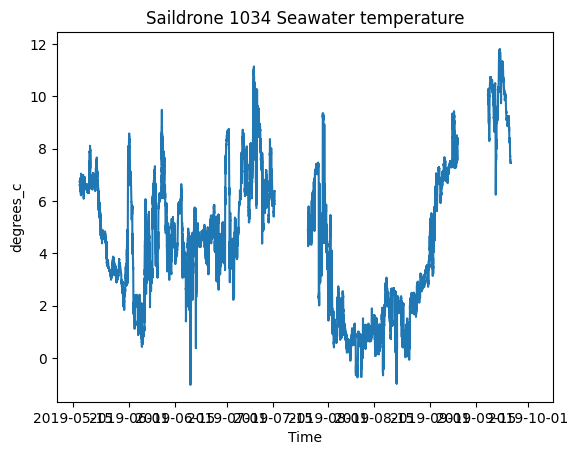

In [7]:
plt.plot(temp.time, temp)
plt.title(f'Saildrone {str(int(temp.trajectory.values))} {temp.long_name}')
plt.ylabel(temp.units)
plt.xlabel('Time')
plt.show()

### Trajectory

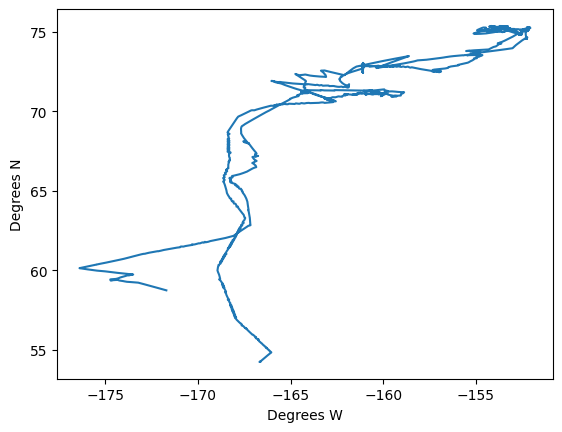

In [8]:
plt.plot(ds.longitude, ds.latitude)
plt.ylabel('Degrees N')
plt.xlabel('Degrees W')
plt.show()